In [2]:
%%!
pip install wget

['Collecting wget',
 '  Downloading wget-3.2.zip (10 kB)',
 'Installing collected packages: wget',
 '    Running setup.py install for wget: started',
 "    Running setup.py install for wget: finished with status 'done'",
 'Successfully installed wget-3.2',
 'WARNING: You are using pip version 20.0.2; however, version 20.1.1 is available.',
 "You should consider upgrading via the 'c:\\osgeo4~1\\bin\\python3.exe -m pip install --upgrade pip' command."]

In [3]:
%%!
pip install plotly

['Requirement already satisfied: plotly in c:\\osgeo4~1\\apps\\python37\\lib\\site-packages (3.3.0)',
 'Requirement already satisfied: nbformat>=4.2 in c:\\osgeo4~1\\apps\\python37\\lib\\site-packages (from plotly) (4.4.0)',
 'Requirement already satisfied: six in c:\\osgeo4~1\\apps\\python37\\lib\\site-packages (from plotly) (1.14.0)',
 'Requirement already satisfied: requests in c:\\osgeo4~1\\apps\\python37\\lib\\site-packages (from plotly) (2.22.0)',
 'Requirement already satisfied: pytz in c:\\osgeo4~1\\apps\\python37\\lib\\site-packages (from plotly) (2019.3)',
 'Requirement already satisfied: decorator>=4.0.6 in c:\\osgeo4~1\\apps\\python37\\lib\\site-packages (from plotly) (4.4.1)',
 'Requirement already satisfied: retrying>=1.3.3 in c:\\osgeo4~1\\apps\\python37\\lib\\site-packages (from plotly) (1.3.3)',
 'Requirement already satisfied: jupyter-core in c:\\osgeo4~1\\apps\\python37\\lib\\site-packages (from nbformat>=4.2->plotly) (4.6.3)',
 'Requirement already satisfied: jsonsc

In [2]:
import os
import sys
from osgeo import ogr
os.environ['QT_QPA_PLATFORM'] = 'offscreen'
from qgis.core import *
from qgis.gui import *
from qgis import processing
from qgis.PyQt.QtGui import QColor, QImage
from qgis.PyQt.QtCore import QSize, QBuffer, QIODevice
qgs = QgsApplication([], False)
qgs.initQgis()
print(QgsApplication.showSettings())
from qgis.PyQt.QtGui import QColor, QImage
from qgis.PyQt.QtCore import QSize, QBuffer, QIODevice
from IPython.display import Image
from datetime import date
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
import numpy as np
import csv
from matplotlib.pyplot import pie, axis, show
%matplotlib inline

Application state:
QGIS_PREFIX_PATH env var:		C:/OSGEO4~1/apps/qgis
Prefix:		C:/OSGEO4~1/apps/qgis
Plugin Path:		C:/OSGEO4~1/apps/qgis/plugins
Package Data Path:	C:/OSGEO4~1/apps/qgis/.
Active Theme Name:	
Active Theme Path:	C:/OSGEO4~1/apps/qgis/./resources/themes\\icons/
Default Theme Path:	:/images/themes/default/
SVG Search Paths:	C:/OSGEO4~1/apps/qgis/./svg/
		C:/Users/ASUS/AppData/Roaming/python3\profiles\default/svg/
User DB Path:	C:/OSGEO4~1/apps/qgis/./resources/qgis.db
Auth DB Path:	C:/Users/ASUS/AppData/Roaming/python3\profiles\default/qgis-auth.db



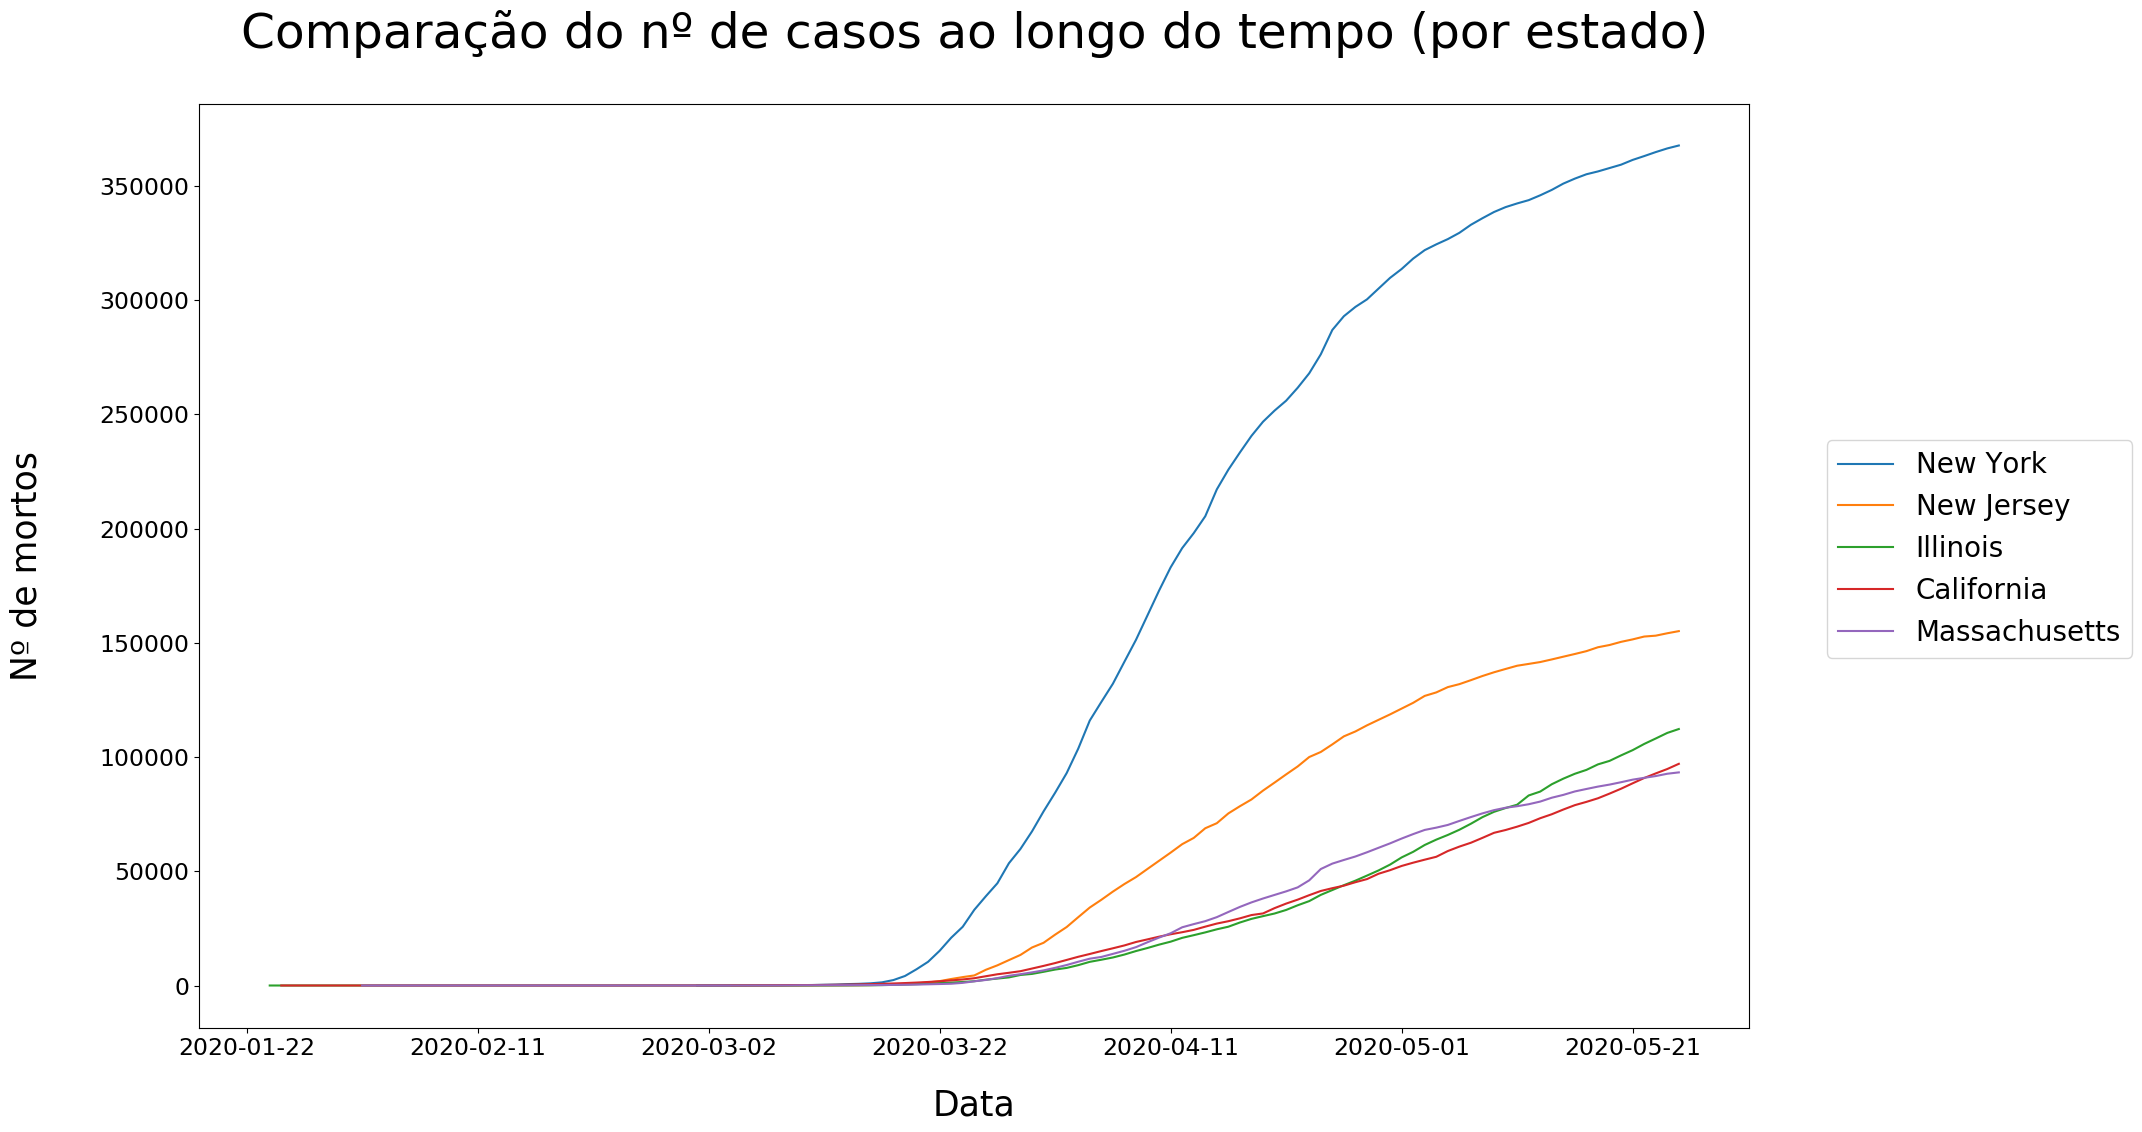

In [38]:
#grafico
plt.rcParams.update(plt.rcParamsDefault)
plt.style.use('default')

#plt.title('Estados com maior número de desempregados', weight='bold', size=12)

#import data
data = pd.read_csv("C:/Users/ASUS/Desktop/Trabalho_SIG/US/us-states-todasasdatas.csv", encoding='utf-8', skiprows=[1])

atual = data[data['date']=='2020-05-25']

#nº de mortes 2020-05-25
mortos = atual.groupby(['state'])['cases'].sum()

#state_5 = data.sort_values('deaths', ascending= False)
#state_5=state_5.head(5)

#seleciona os 5 estados com maior nº de mortos
state_5=mortos.sort_values(ascending=False)[:5].index



grouped = data.groupby(['state', 'date'])['cases'].sum().reset_index()
#print(grouped)


byState = grouped.pivot(columns='state', index='date', values='cases')


byState[state_5].plot(kind='line', figsize=(20,12))


plt.legend(loc=(1.05,.4), fontsize='20', ncol=1)
plt.title("Comparação do nº de casos ao longo do tempo (por estado)",fontsize=35,  pad=40)

plt.xticks(fontsize=17, color="black")
plt.yticks(fontsize=17, color="black");
plt.ylabel("Nº de mortos", fontsize=25, color="black", labelpad=40)
plt.xlabel("Data", fontsize=25, color="black", labelpad=20)
plt.savefig('Figuras/comparacaocasosstate.jpg', bbox_inches='tight')
plt.show()


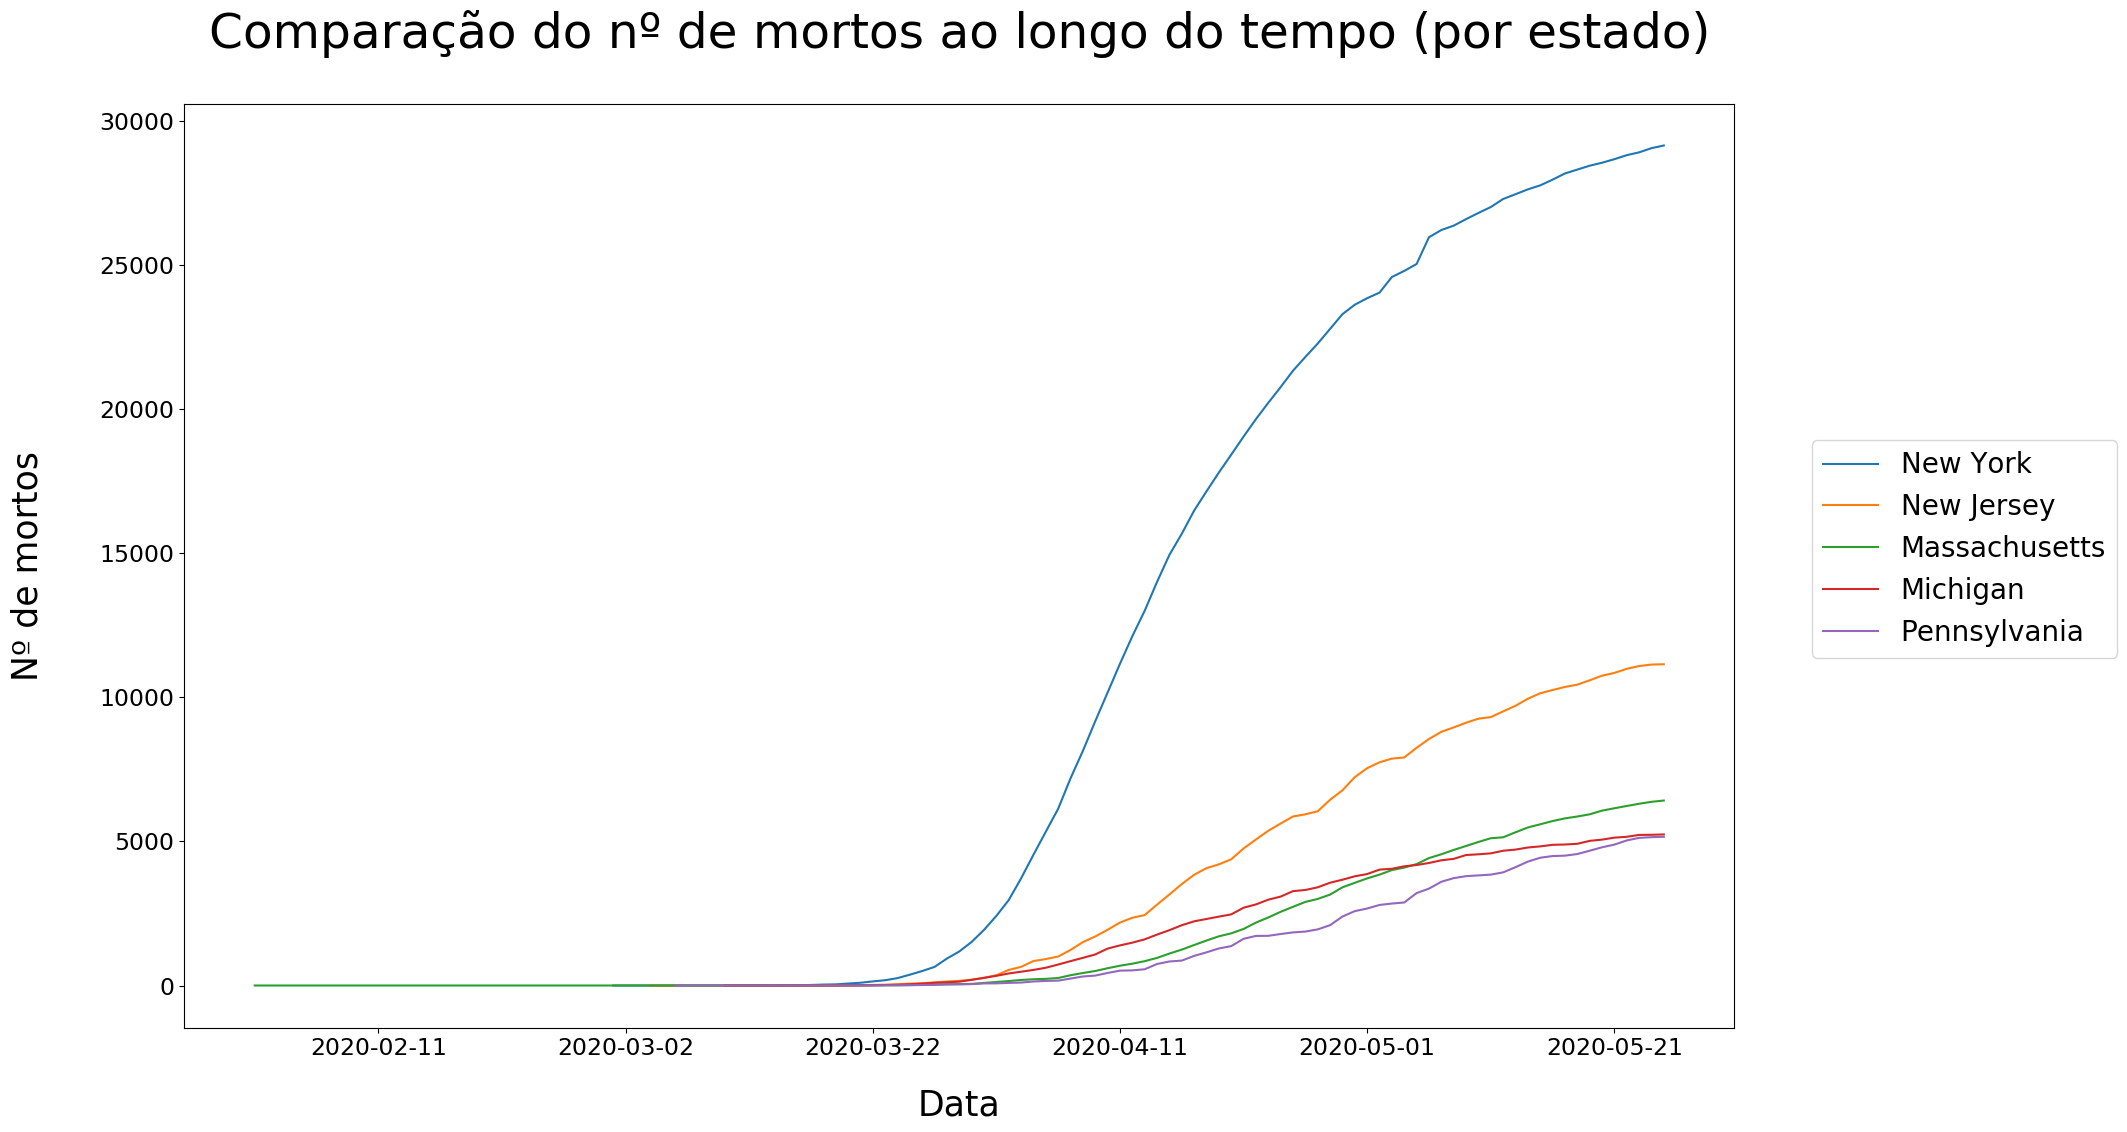

In [39]:
#grafico
plt.rcParams.update(plt.rcParamsDefault)
plt.style.use('default')

#plt.title('Estados com maior número de desempregados', weight='bold', size=12)

#import data
data = pd.read_csv("C:/Users/ASUS/Desktop/Trabalho_SIG/US/us-states-todasasdatas.csv", encoding='utf-8', skiprows=[1])

atual = data[data['date']=='2020-05-25']

#nº de mortes 2020-05-25
mortos = atual.groupby(['state'])['deaths'].sum()

#state_5 = data.sort_values('deaths', ascending= False)
#state_5=state_5.head(5)

#seleciona os 5 estados com maior nº de mortos
state_5=mortos.sort_values(ascending=False)[:5].index



grouped = data.groupby(['state', 'date'])['deaths'].sum().reset_index()
#print(grouped)


byState = grouped.pivot(columns='state', index='date', values='deaths')


byState[state_5].plot(kind='line', figsize=(20,12))


plt.legend(loc=(1.05,.4), fontsize='20', ncol=1)
plt.title("Comparação do nº de mortos ao longo do tempo (por estado)",fontsize=35,  pad=40)

plt.xticks(fontsize=17, color="black")
plt.yticks(fontsize=17, color="black");
plt.ylabel("Nº de mortos", fontsize=25, color="black", labelpad=40)
plt.xlabel("Data", fontsize=25, color="black", labelpad=20)
plt.savefig('Figuras/comparacaomortosstate.jpg', bbox_inches='tight')
plt.show()